In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import datetime

In [2]:
data = np.loadtxt(open("../data/51peg_model_rvs.txt", 'rb'), usecols=range(2))

# This is how we pull out the data from columns in the array.
date = data[:,0]
rvel = data[:,1] + stats.norm(loc=0, scale=50).rvs(size=len(date))
#rvel_err = data[:,2]

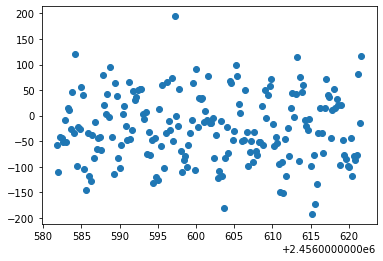

In [3]:
#_ = plt.errorbar(date, rvel, yerr=rvel_err, fmt='.')
_ = plt.scatter(date, rvel)

In [4]:
from scipy.fft import fft, fftfreq

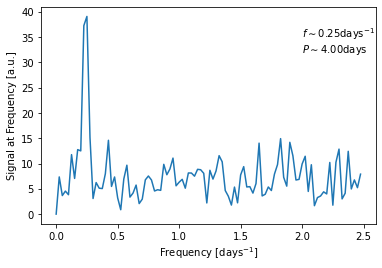

In [5]:
# Number of sample points
N = len(date)

# Arbitrary offset in data
offset = np.mean(rvel)

# sample spacing

T = np.mean(date[1:] - date[0:-1])

yf = fft(rvel-offset)

xf = fftfreq(N, T)[:N//2]

_ = plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

_ = plt.ylabel("Signal at Frequency [a.u.]")
_ = plt.xlabel(r"Frequency [${\rm days}^{-1}$]")

freq_max = xf[np.argmax(np.abs(yf[0:N//2]))]
period = 1./freq_max

_ = plt.annotate(r"$f \sim %0.2f {\rm days}^{-1}$" % freq_max, (2.0, 35))
_ = plt.annotate(r"$P \sim %0.2f {\rm days}$" % period, (2.0, 32))

In [8]:
data = np.loadtxt(open("../data/Vela_Flux.txt", 'rb'), usecols=range(7))

# This is how we pull out the data from columns in the array.

# This is the date in "Mission Elapsesd Time"
# For the Fermi mission, this is defined to be the number of seconds since the start of 2001.
date_MET = data[:,0]
# This is the offset in seconds between the Fermi "MET" and the UNIX "epoch" used by matplotlib
MET_To_Unix = 978336000

# These are the numbers of photons observed from Vela each week in the "low" Energy Band (100 MeV - 800 MeV)
nObs_LE = data[:,1]

# These are the number of photons expected from Vela each week, under the assumption that it is 
# not varying at all, and the only differences depend on how long we spent looking at Vela
# that particular weeek
nExp_LE = data[:,2]

# These are the band bounds, in MeV
LE_bounds = (100., 800.)

# This is the "significance" of the variation for each week.  We will discuss this more later
signif_LE = data[:,3]

nObs_HE = data[:,4]
nExp_HE = data[:,5]
signif_HE = data[:6]
HE_bounds = (800., 10000.)

# This converts the dates to something that matplotlib understands
dates = [datetime.datetime.fromtimestamp(date + MET_To_Unix) for date in date_MET]


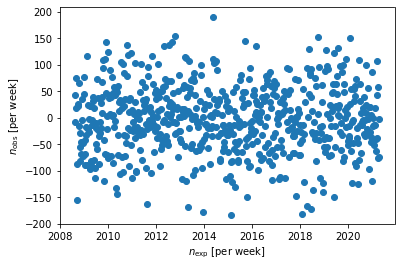

In [19]:
_ = plt.scatter(dates, nObs_LE-nExp_LE)
_ = plt.xlabel(r"$n_{\rm exp}$ [per week]")
_ = plt.ylabel(r"$n_{\rm obs}$ [per week]")

In [21]:
np.corrcoef(date_MET, nObs_LE-nExp_LE)[0,1]

-0.012672485618664731